# Import packages and data

In [7]:
##packages
import numpy as np 
import pandas as pd 
from scipy.stats import randint 
import matplotlib.pyplot as plt 
import seaborn as sns 

from pandas import set_option

plt.style.use('ggplot')


from FeaturesEngineering.preprocessing import *

In [8]:
##data loading 

data=prepocess_data("./data/raw/CreditTraining.csv")

data=data.dropna()
data.sample(10)



,Y,Customer_Type,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category,join_age,sub_delay,is_closed_date
2843,0,Non Existing Client,NP_Client,University,Single,0.0,25,18.0,4.0,C,Sales,Owned,1,M,29,6,0
392,0,Non Existing Client,NP_Client,University,Married,0.0,5,18.0,2.0,C,Sales,Owned,1,D,45,15,0
3642,0,Existing Client,P_Client,University,Married,0.0,10,60.0,2.0,C,Branch,Old rent,1,D,28,1310,0
1891,0,Existing Client,NP_Client,Master/PhD,Married,2.0,20,100.0,18.0,G,Branch,Owned,1,C,51,16,0
4487,0,Non Existing Client,NP_Client,University,Married,1.0,28,56.0,5.0,C,Branch,Owned,2,B,28,1,1
960,0,Non Existing Client,NP_Client,University,Married,0.0,15,30.0,1.0,C,Sales,Owned,1,B,39,34,0
2148,0,Non Existing Client,NP_Client,University,Married,2.0,8,25.0,1.0,C,Sales,Owned,2,B,34,1,1
208,0,Non Existing Client,NP_Client,University,Married,3.0,57,240.0,11.0,C,Branch,Owned,1,B,55,2,0
3774,0,Non Existing Client,NP_Client,University,Married,0.0,1,36.0,1.0,C,Sales,Owned,1,D,64,0,0
2847,0,Non Existing Client,NP_Client,University,Married,0.0,10,36.0,3.0,C,Sales,Owned,1,B,37,2,1


Many variables must to be converted into categories

# Features engineering 

In [9]:
##Features engeenering 

## Income divide by num of year in business
data["bussiness_salaries"]=data["Net_Annual_Income"].astype("float")/(1+data["Years_At_Business"].values)

## change all status different to married to "Single"
data["Marital_Status"]=np.where((data["Marital_Status"]!="Married"),"Single",data["Marital_Status"])

## Income divide by Nb_Poject

data["Nb_salaries"]=data["Net_Annual_Income"].astype("float")/(1+data["Nb_Of_Products"].values)

##dependance divide by num of year in business

data["money_by_person"]=data["Net_Annual_Income"]/(1+data["Number_Of_Dependant"])

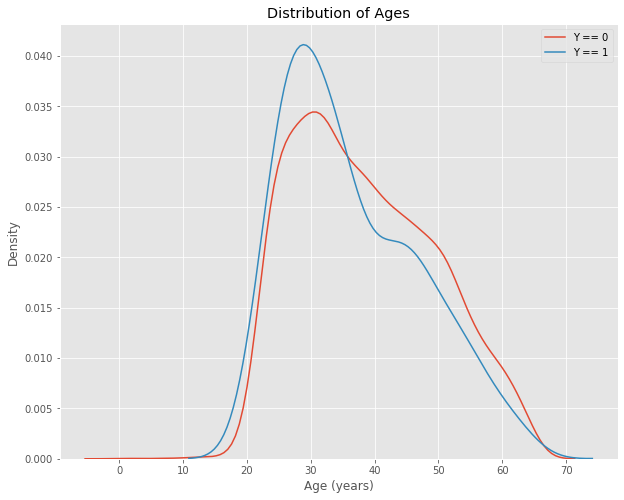

In [10]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['Y'] == 0, 'join_age'], label = 'Y == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['Y'] == 1, 'join_age'] , label = 'Y == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

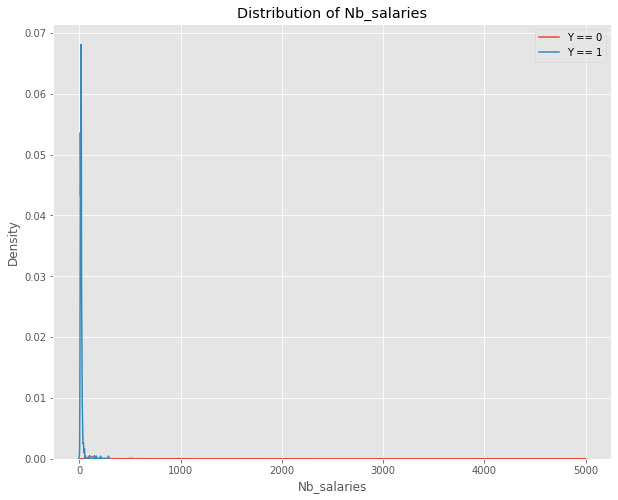

In [11]:

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['Y'] == 0, 'Nb_salaries'], label = 'Y == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['Y'] == 1, 'Nb_salaries'] , label = 'Y == 1')

# Labeling of plot
plt.xlabel('Nb_salaries'); plt.ylabel('Density'); plt.title('Distribution of Nb_salaries');

In [12]:
# Bin the age data

# age_data=data[["join_age","Y"]]

data['YEARS_BINNED'] = pd.cut(data['join_age'], bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])



In [13]:
age_data=data[["join_age","YEARS_BINNED","Y"]]

In [14]:
#Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,join_age,Y
YEARS_BINNED,,
"(0, 25]",23.342508,0.081040
"(25, 30]",28.049234,0.100656
"(30, 35]",32.895259,0.082690
"(35, 40]",37.916442,0.056604
"(40, 45]",42.973412,0.063516
"(45, 50]",47.946735,0.065292
"(50, 55]",52.773987,0.061834
"(55, 60]",57.947368,0.045614
"(60, 65]",62.583333,0.048611


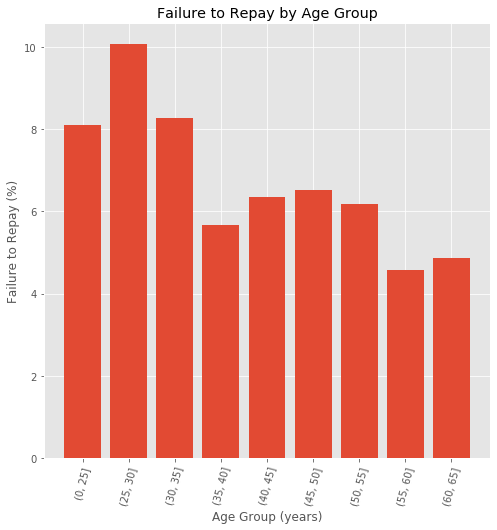

In [15]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['Y'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [16]:
# age_groups=age_groups.drop(["Y"],axis=1)

age_groups=age_groups.rename(columns={"join_age": "mean_age"})
age_groups=age_groups.drop("Y",axis=1)

In [17]:

data = pd.merge(data,age_groups,on = 'YEARS_BINNED',how = 'left')


In [18]:
data["ratio_age_business"]=data["mean_age"]/(1+data["Years_At_Residence"])

In [19]:
data.columns
data=data.drop(["join_age","YEARS_BINNED","mean_age"],axis=1)

In [20]:
y=data.Y ## The targets

features=data.drop("Y",axis=1,inplace=False) ## Clients features

In [21]:
data.sample(10)

,Y,Customer_Type,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category,sub_delay,is_closed_date,bussiness_salaries,Nb_salaries,money_by_person,ratio_age_business
2995,0,Existing Client,NP_Client,University,Married,1.0,10,36.0,1.0,C,Branch,Owned,2,B,10352,1,18.000000,12.0,18.0,2.549930
1329,0,Existing Client,NP_Client,University,Married,4.0,4,25.0,1.0,C,Sales,Owned,1,B,1470,0,12.500000,12.5,5.0,7.583288
2346,0,Existing Client,NP_Client,University,Single,0.0,20,28.0,0.0,G,Branch,Owned,1,B,143,0,28.000000,14.0,28.0,1.111548
2604,0,Non Existing Client,NP_Client,University,Married,1.0,3,18.0,2.0,C,Sales,Owned,1,B,1,0,6.000000,9.0,9.0,7.012309
1708,0,Existing Client,P_Client,University,Married,0.0,1,36.0,1.0,C,Sales,Owned,2,B,976,1,18.000000,12.0,36.0,16.447630
4416,0,Existing Client,P_Client,University,Married,0.0,30,36.0,10.0,C,Sales,Owned,1,B,2077,0,3.272727,18.0,36.0,0.904814
3128,0,Non Existing Client,NP_Client,University,Single,0.0,1,36.0,1.0,C,Sales,Owned,1,B,7,0,18.000000,18.0,36.0,16.447630
1991,0,Non Existing Client,NP_Client,University,Married,2.0,1,36.0,1.0,C,Sales,Owned,1,B,2,0,18.000000,18.0,12.0,18.958221
758,1,Existing Client,NP_Client,Master/PhD,Married,2.0,25,420.0,24.0,G,Branch,Owned,1,C,2331,1,16.800000,210.0,140.0,1.652824
3523,0,Existing Client,NP_Client,University,Single,0.0,1,50.0,3.0,C,Branch,Owned,1,B,1039,1,12.500000,25.0,50.0,14.024617


In [22]:
col_names=["Customer_Type","P_Client","Educational_Level","Marital_Status","Number_Of_Dependant","Prod_Sub_Category","Source","Years_At_Business","Years_At_Residence","Type_Of_Residence","Nb_Of_Products","Prod_Category"]

In [23]:
for col_name in col_names:
    print(col_name ,":" ,data[col_name].unique())

Customer_Type : ['Non Existing Client' 'Existing Client']
P_Client : ['NP_Client' 'P_Client']
Educational_Level : ['University' 'Master/PhD' 'Secondary or Less' 'Diploma']
Marital_Status : ['Married' 'Single']
Number_Of_Dependant : [ 3.  0.  2.  4.  1.  5.  7.  6. 20. 12.]
Prod_Sub_Category : ['C' 'P' 'G']
Source : ['Sales' 'Branch']
Years_At_Business : [ 1.  2.  3.  4.  6. 16. 50.  5. 20. 10.  8. 15. 19. 21.  0. 11. 30. 12.
 22. 14. 18.  7. 98. 35. 13. 23. 26.  9. 24. 32. 29. 17. 40. 31. 25. 27.
 54. 28. 34. 97. 37. 33. 39. 48.]
Years_At_Residence : [ 1 12 10  3 28 15  0 35  2  8 27  4 22 18 16  5 50 20 38  6 11 25 30 24
  7 34 40 17 23 21 32 19 29 57  9 26 37 13 47 62 14 31 60 33 55 49 45 51
 36 54 59 52 43 44 42 70 39 48 46 41]
Type_Of_Residence : ['Owned' 'Parents' 'New rent' 'Old rent' 'Company']
Nb_Of_Products : [1 2 3]
Prod_Category : ['B' 'G' 'L' 'D' 'C' 'E' 'K' 'M' 'H' 'J' 'A' 'F' 'I']


# Exploratory Data Analysis ( EDA)

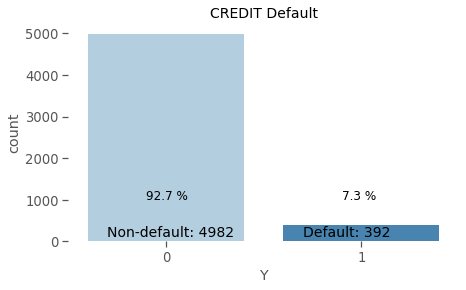

In [24]:
## Default frequency

n_customer=len(data)
n_default=data.Y.sum()

n_no_default=n_customer-n_default

##percentage 

default_perc=round(n_default/n_customer*100,1)
no_default_perc=round(n_no_default/n_customer*100,1)


##Plotting
import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Y',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(n_no_default), xy=(-0.3, 120), xytext=(-0.3, 120), size=14)
plt.annotate('Default: {}'.format(n_default),  xy=(0.7, 120), xytext=(0.7, 120), size=14)
plt.annotate(str(no_default_perc)+" %", xy=(-0.3, 1000), xytext=(-0.1, 1000), size=12)
plt.annotate(str(default_perc)+" %", xy=(0.7, 1000), xytext=(0.9, 1000), size=12)
plt.title('CREDIT Default', size=14)
# #Removing the frame
plt.box(False);

We're dealing with unbalanced data 

In [25]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

                      count    mean      std   min    25%    50%     75%       max
Y                    5374.0    0.07     0.26  0.00   0.00   0.00    0.00      1.00
Number_Of_Dependant  5374.0    1.06     1.34  0.00   0.00   0.00    2.00     20.00
Years_At_Residence   5374.0   12.63     9.98  0.00   4.00  10.00   18.00     70.00
Net_Annual_Income    5374.0   61.14   237.83  0.00  20.00  36.00   36.00  10000.00
Years_At_Business    5374.0    4.27     7.23  0.00   1.00   1.00    4.00     98.00
Nb_Of_Products       5374.0    1.09     0.30  1.00   1.00   1.00    1.00      3.00
sub_delay            5374.0  458.16  1136.11  0.00   2.00   7.00  303.50  10944.00
is_closed_date       5374.0    0.22     0.41  0.00   0.00   0.00    0.00      1.00
bussiness_salaries   5374.0   15.88    31.55  0.00   6.00  10.22   18.00   1000.00
Nb_salaries          5374.0   29.65   117.08  0.00  10.00  18.00   18.00   5000.00
money_by_person      5374.0   35.41    89.01  0.

In [26]:
# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder()

# for name in categ_names:
#     data[name]=lb_make.fit_transform(data[name])

In [27]:
# data[205:215]

label_encoder-> ordre alphabétique

In [28]:
# # Creating a new dataframe with categorical variables
# subset = data[categ_names]

# print(len(categ_names))

# f, axes = plt.subplots(2, 5, figsize=(20, 10), facecolor='white')
# i=0

# f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
# ax1= sns.countplot(x="Nb_Of_Products", hue="Y", data=data, palette="Blues", ax=axes[0,0])

# ax2= sns.countplot(x="P_Client", hue="Y", data=data, palette="Blues", ax=axes[0,1])

# ax3= sns.countplot(x="Educational_Level", hue="Y", data=data, palette="Blues", ax=axes[0,2])

# ax4= sns.countplot(x="Marital_Status", hue="Y", data=data, palette="Blues", ax=axes[0,3])

# ax5= sns.countplot(x="Number_Of_Dependant", hue="Y", data=data, palette="Blues", ax=axes[0,4])
# ax6= sns.countplot(x="Prod_Sub_Category", hue="Y", data=data, palette="Blues", ax=axes[1,0])
# ax7= sns.countplot(x="Source", hue="Y", data=data, palette="Blues", ax=axes[1,1])
# ax8= sns.countplot(x="Type_Of_Residence", hue="Y", data=data, palette="Blues", ax=axes[1,2])
# ax9= sns.countplot(x="Nb_Of_Products", hue="Y", data=data, palette="Blues", ax=axes[1,3])

# ax10= sns.countplot(x="Prod_Category", hue="Y", data=data, palette="Blues", ax=axes[1,4])

In [29]:
# #  looking at correlations matrix, defined via Pearson function  
# corr = data.corr(method="pearson") # .corr is used to find corelation
# f,ax = plt.subplots(figsize=(8, 7))

# # fig, ax = plt.subplots(figsize=(10,10))
# # #     sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
# # #                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
# # #     plt.show();
# sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
#             xticklabels= True, yticklabels= True
#             ,cmap="coolwarm", linewidths=.7, ax=ax)
# plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [30]:
corr = data.corr()['Y'].sort_values()# .corr is used to find corelation
corr

sub_delay             -7.29e-02
Nb_Of_Products        -5.48e-02
Years_At_Residence    -3.40e-02
Number_Of_Dependant   -3.17e-02
bussiness_salaries    -2.79e-02
Net_Annual_Income     -2.61e-02
Years_At_Business     -2.53e-02
Nb_salaries           -2.47e-02
money_by_person       -2.34e-02
ratio_age_business     6.38e-03
is_closed_date         4.74e-01
Y                      1.00e+00
Name: Y, dtype: float64

In [31]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [32]:
# df = data.drop("Id_Customer", axis=1)
# df = data.drop("Prod_Closed_Date", axis=1)
# df = df.drop("BirthDate", axis=1)
# df = df.drop("Customer_Open_Date", axis=1)
# df = df.drop("Prod_Decision_Date", axis=1)
# df = df.drop("age_open", axis=1)
df = data.dropna()
categ_names=["Customer_Type","P_Client","Educational_Level","Marital_Status","Prod_Sub_Category","Source","Type_Of_Residence","Prod_Category"]
for cname in categ_names:
    df[cname] = df[cname].astype('category')
    
y = df.Y
X = df.drop("Y", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [33]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [34]:
X_train.dtypes

Customer_Type          category
P_Client               category
Educational_Level      category
Marital_Status         category
Number_Of_Dependant     float64
Years_At_Residence        int64
Net_Annual_Income       float64
Years_At_Business       float64
Prod_Sub_Category      category
Source                 category
Type_Of_Residence      category
Nb_Of_Products            int64
Prod_Category          category
sub_delay                 int64
is_closed_date            int64
bussiness_salaries      float64
Nb_salaries             float64
money_by_person         float64
ratio_age_business      float64
dtype: object

In [41]:
params = {
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}
evals_result = {}  # to record eval results for plotting
cc = ['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status',
       'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business',
       'Prod_Sub_Category', 'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Category',
      'sub_delay', 'is_closed_date', 'bussiness_salaries', 'money_by_person',"ratio_age_business","Nb_salaries"]

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=cc,
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

[10]	training's l1: 0.103153	training's l2: 0.0456862	valid_1's l1: 0.101838	valid_1's l2: 0.0467002
[20]	training's l1: 0.0915315	training's l2: 0.0420941	valid_1's l1: 0.0911642	valid_1's l2: 0.0439997
[30]	training's l1: 0.087061	training's l2: 0.0407068	valid_1's l1: 0.0881815	valid_1's l2: 0.0437001
[40]	training's l1: 0.0850894	training's l2: 0.0400284	valid_1's l1: 0.0868963	valid_1's l2: 0.0437284
[50]	training's l1: 0.0844702	training's l2: 0.0396351	valid_1's l1: 0.0867768	valid_1's l2: 0.0438616
[60]	training's l1: 0.0841583	training's l2: 0.0393089	valid_1's l1: 0.0869512	valid_1's l2: 0.0439215
[70]	training's l1: 0.0841563	training's l2: 0.0390477	valid_1's l1: 0.087326	valid_1's l2: 0.0439097
[80]	training's l1: 0.0841354	training's l2: 0.0387195	valid_1's l1: 0.087619	valid_1's l2: 0.0438287
[90]	training's l1: 0.0840862	training's l2: 0.0384895	valid_1's l1: 0.0879312	valid_1's l2: 0.0438516
[100]	training's l1: 0.0839566	training's l2: 0.0382884	valid_1's l1: 0.088222

In [35]:
len(cc)

18

In [36]:
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [37]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()
    
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])

interactive(children=(Dropdown(description='metric_name', options=('l1', 'l2'), value='l1'), Output()), _dom_c…

In [38]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

In [39]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…